In [ ]:
from pprint import pprint
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(f'https://drive.google.com/uc?id=1igBMJ4Knud12EhgLXVp6ib5hHRCbkPf2')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
pprint(df.columns)

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')


In [ ]:
df.rename(columns={'Zone 2  Power Consumption': 'Zone 2 Power Consumption'}, inplace=True)
df.rename(columns={'Zone 3  Power Consumption': 'Zone 3 Power Consumption'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   general diffuse flows     52416 non-null  float64
 5   diffuse flows             52416 non-null  float64
 6   Zone 1 Power Consumption  52416 non-null  float64
 7   Zone 2 Power Consumption  52416 non-null  float64
 8   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
df.DateTime.min(),  df.DateTime.max()

('1/1/2017 0:00', '9/9/2017 9:50')

In [ ]:
df.shape

(52416, 9)

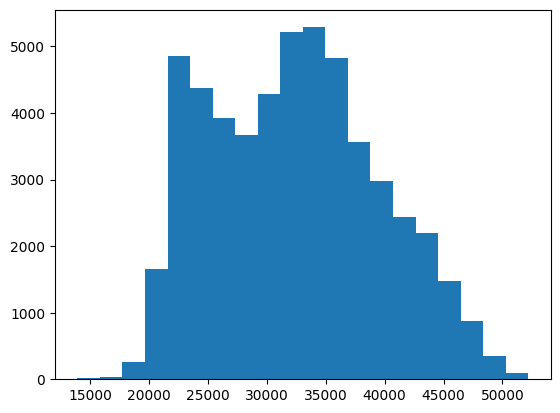

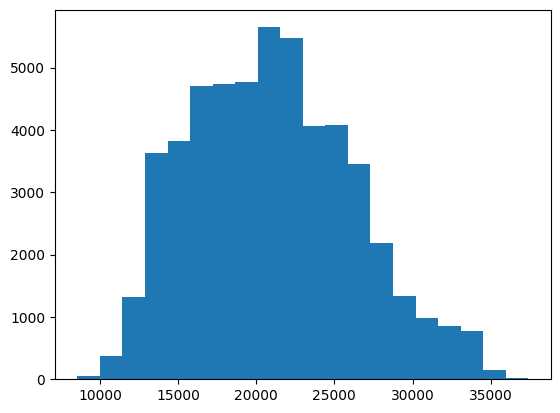

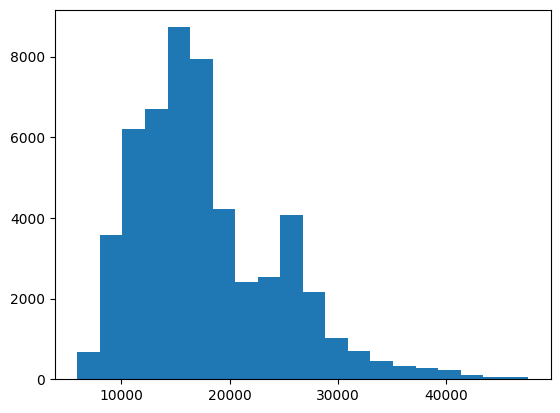

In [ ]:
plt.hist(df['Zone 1 Power Consumption'],bins=20)
plt.show()

plt.hist(df['Zone 2 Power Consumption'], bins=20)
plt.show()

plt.hist(df['Zone 3 Power Consumption'], bins=20)
plt.show()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr = df.select_dtypes(include=numerics).corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506
Zone 1 Power Consumption,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000


In [ ]:
df.set_index('DateTime', inplace=True)
df.index = pd.to_datetime(df.index)

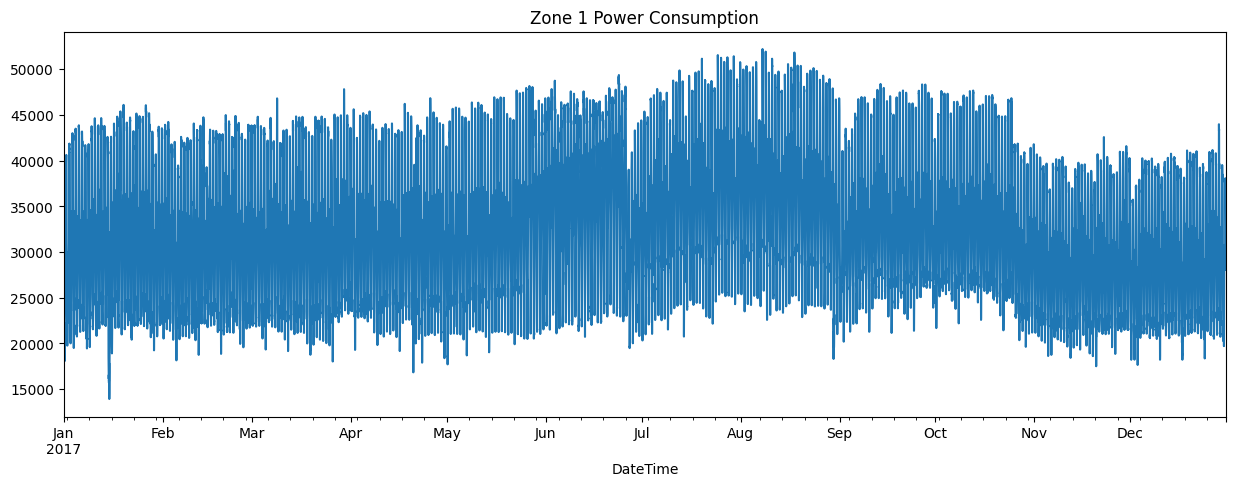

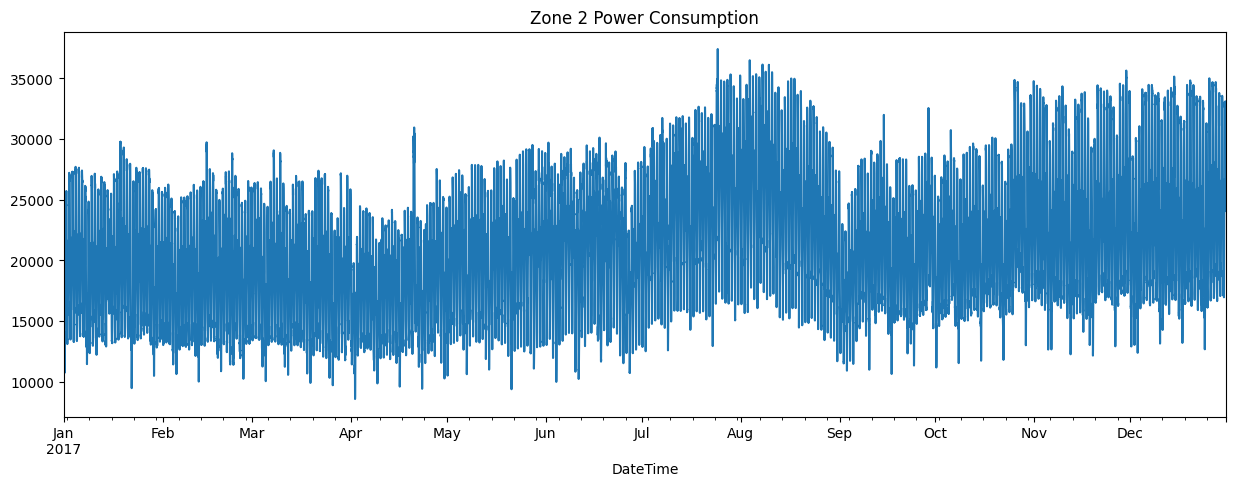

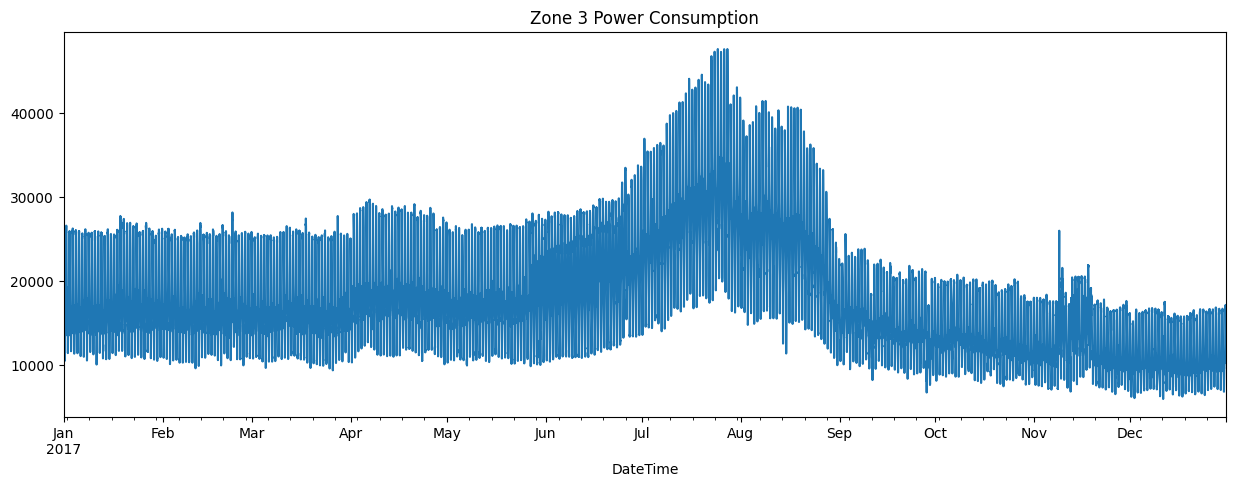

In [ ]:
df['Zone 1 Power Consumption'].plot(figsize=(15,5), title='Zone 1 Power Consumption')
plt.show()
df['Zone 2 Power Consumption'].plot(figsize=(15,5), title='Zone 2 Power Consumption')
plt.show()
df['Zone 3 Power Consumption'].plot(figsize=(15,5), title='Zone 3 Power Consumption')
plt.show()

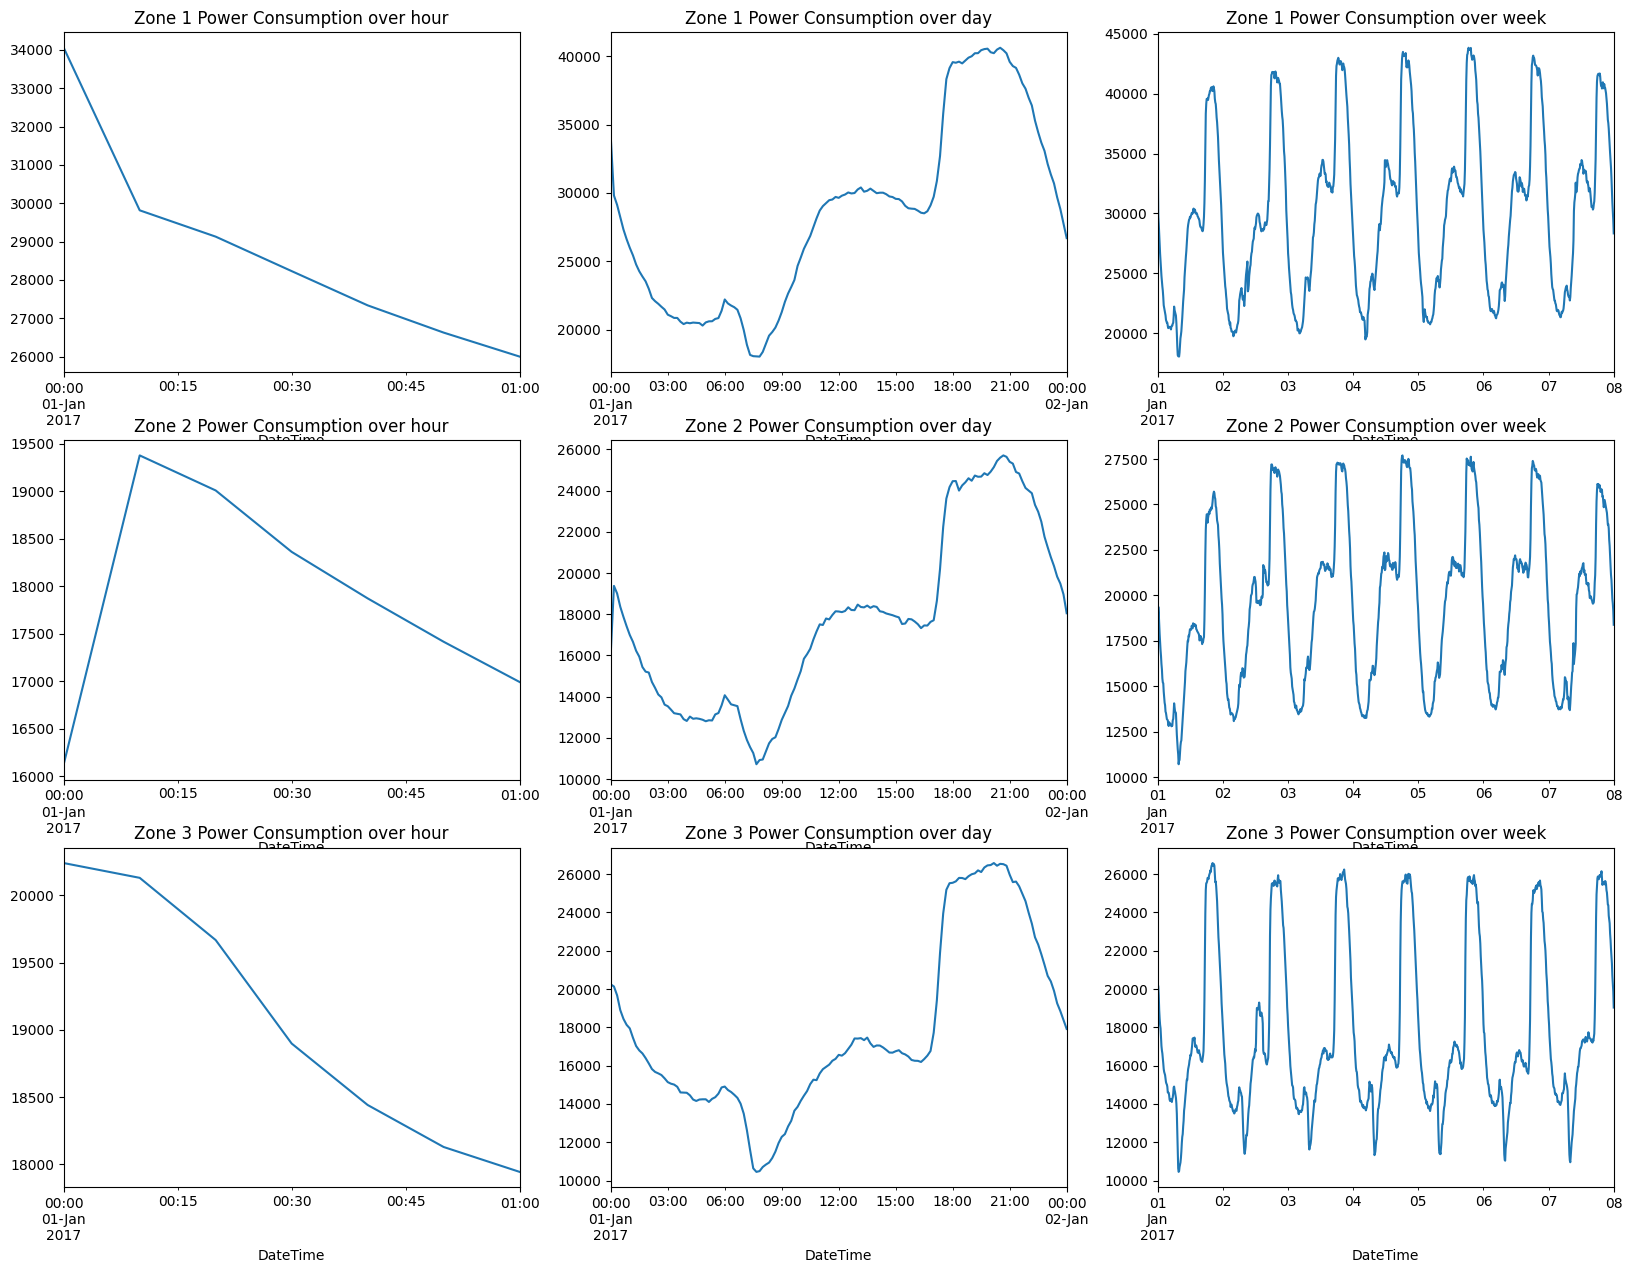

In [ ]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(3, 3, 1)
df['Zone 1 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(hours=1))].plot(ax=ax,
                                                                                                                      title='Zone 1 Power Consumption over hour')
ax = fig.add_subplot(3, 3, 2)
df['Zone 1 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(days=1))].plot(ax=ax,
                                                                                                                      title='Zone 1 Power Consumption over day')
ax = fig.add_subplot(3, 3, 3)
df['Zone 1 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(weeks=1))].plot(ax=ax,
                                                                                                                      title='Zone 1 Power Consumption over week')

ax = fig.add_subplot(3, 3, 4)
df['Zone 2 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(hours=1))].plot(ax=ax,
                                                                                                                      title='Zone 2 Power Consumption over hour')
ax = fig.add_subplot(3, 3, 5)
df['Zone 2 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(days=1))].plot(ax=ax,
                                                                                                                      title='Zone 2 Power Consumption over day')
ax = fig.add_subplot(3, 3, 6)
df['Zone 2 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(weeks=1))].plot(ax=ax,
                                                                                                                      title='Zone 2 Power Consumption over week')

ax = fig.add_subplot(3, 3, 7)
df['Zone 3 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(hours=1))].plot(ax=ax,
                                                                                                                      title='Zone 3 Power Consumption over hour')
ax = fig.add_subplot(3, 3, 8)
df['Zone 3 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(days=1))].plot(ax=ax,
                                                                                                                      title='Zone 3 Power Consumption over day')
ax = fig.add_subplot(3, 3, 9)
df['Zone 3 Power Consumption'][(df.index.min() <= df.index) & (df.index <= df.index.min() + timedelta(weeks=1))].plot(ax=ax,
                                                                                                                      title='Zone 3 Power Consumption over week')

plt.show()

In [ ]:
ORIGINAL_FEATURES = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
TARGETS = ['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']

# Add custom features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_of_week
for c_name in ORIGINAL_FEATURES + TARGETS:
    for i in [6, 144]: # hour, day, month
        new_c_name = c_name + f' rolling_avg_over_{i}'
        df[new_c_name] = df[c_name].shift(1).rolling(i, 0).mean()

for c_name in ORIGINAL_FEATURES + TARGETS:
    new_c_name = c_name + f' lag_1'
    df[new_c_name] = df[c_name].shift(1)

DATETIME_FEATURES = ['hour', 'day_of_week']

LAG1_FEATURES =  ['Temperature lag_1',
                  'Humidity lag_1',
                  'Wind Speed lag_1',
                  'general diffuse flows lag_1',
                  'diffuse flows lag_1']
LAG1_FOR_TARGETS_FEATURES = ['Zone 1 Power Consumption lag_1',
                             'Zone 2 Power Consumption lag_1',
                             'Zone 3 Power Consumption lag_1']

ROLLING_AVG_OVER_HOUR_FEATURES = ['Temperature rolling_avg_over_6',
                                  'Humidity rolling_avg_over_6',
                                  'Wind Speed rolling_avg_over_6',
                                  'general diffuse flows rolling_avg_over_6',
                                  'diffuse flows rolling_avg_over_6']
ROLLING_AVG_OVER_DAY_FEATURES = ['Temperature rolling_avg_over_144',
                                  'Humidity rolling_avg_over_144',
                                  'Wind Speed rolling_avg_over_144',
                                  'general diffuse flows rolling_avg_over_144',
                                  'diffuse flows rolling_avg_over_144']

ROLLING_AVG_OVER_HOUR_FOR_TARGETS_FEATURES = ['Zone 1 Power Consumption rolling_avg_over_6',
                                              'Zone 2 Power Consumption rolling_avg_over_6',
                                              'Zone 3 Power Consumption rolling_avg_over_6']
ROLLING_AVG_OVER_DAY_FOR_TARGETS_FEATURES = ['Zone 1 Power Consumption rolling_avg_over_144',
                                              'Zone 2 Power Consumption rolling_avg_over_144',
                                              'Zone 3 Power Consumption rolling_avg_over_144']
FEATURES = (ORIGINAL_FEATURES
            + DATETIME_FEATURES
            + LAG1_FEATURES
            + LAG1_FOR_TARGETS_FEATURES
            + ROLLING_AVG_OVER_HOUR_FEATURES
            + ROLLING_AVG_OVER_DAY_FEATURES
            + ROLLING_AVG_OVER_HOUR_FOR_TARGETS_FEATURES
            + ROLLING_AVG_OVER_DAY_FOR_TARGETS_FEATURES)

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,hour,day_of_week,...,Zone 3 Power Consumption rolling_avg_over_6,Zone 3 Power Consumption rolling_avg_over_144,Temperature lag_1,Humidity lag_1,Wind Speed lag_1,general diffuse flows lag_1,diffuse flows lag_1,Zone 1 Power Consumption lag_1,Zone 2 Power Consumption lag_1,Zone 3 Power Consumption lag_1
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,...,20240.963860,20240.963860,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,...,20186.024100,20186.024100,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,...,20013.493977,20013.493977,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,...,19734.939760,19734.939760,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711


In [ ]:
df = df.dropna()

In [ ]:
X = df[FEATURES]
Y = df[TARGETS]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)

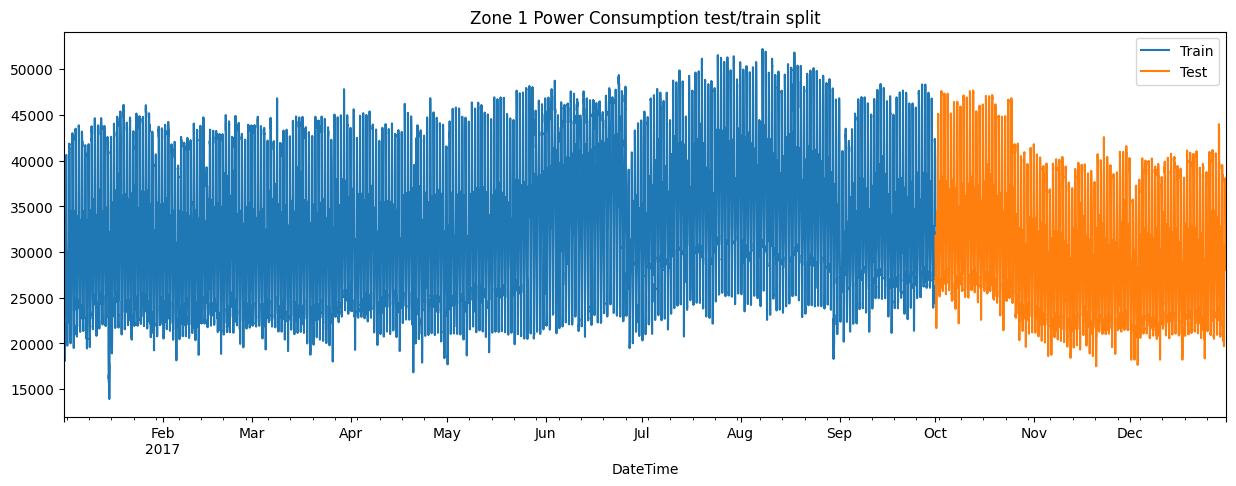

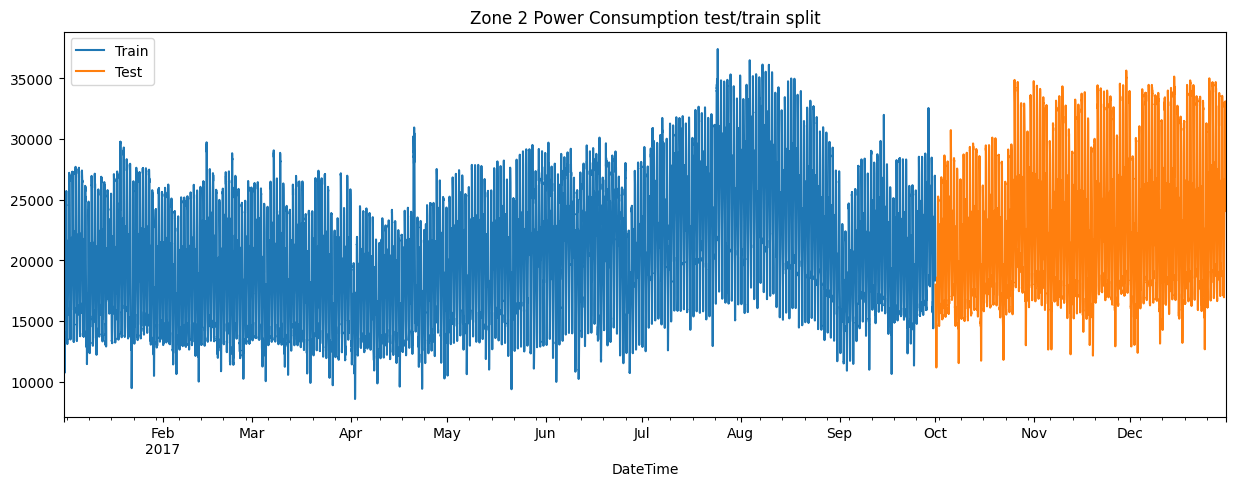

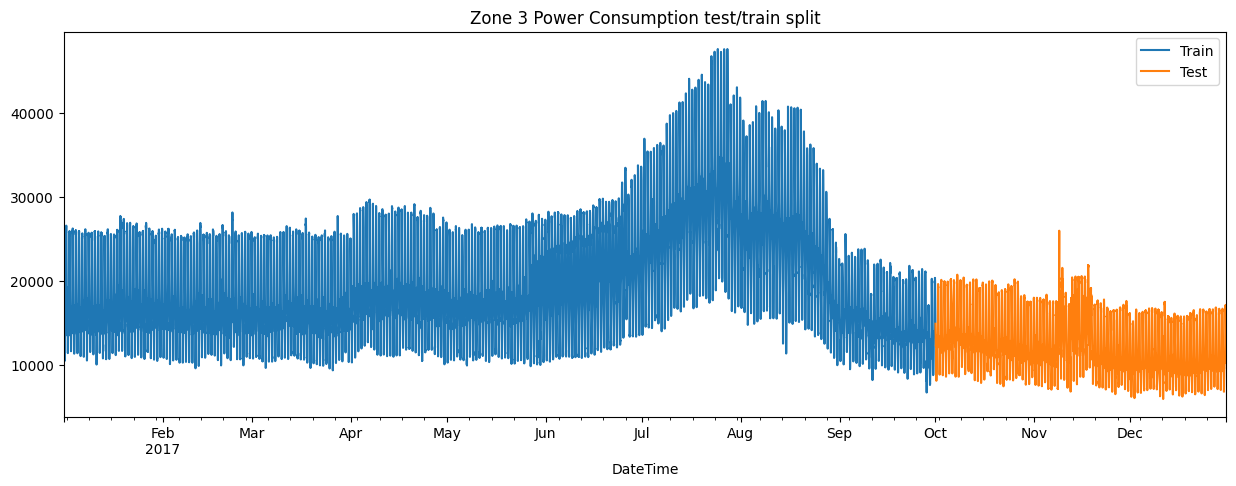

In [ ]:
for t in TARGETS:
    fig, ax = plt.subplots(figsize=(15, 5))
    y_train[t].plot(ax=ax, label='Train', title=t + ' test/train split')
    y_test[t].plot(ax=ax, label='Test')
    ax.legend()
    plt.show()

[0]	validation_0-rmse:7213.20784	validation_1-rmse:6999.57951
[50]	validation_0-rmse:7098.33203	validation_1-rmse:6908.89354
[100]	validation_0-rmse:6992.58805	validation_1-rmse:6826.25156
[150]	validation_0-rmse:6895.05846	validation_1-rmse:6751.88985
[200]	validation_0-rmse:6804.87260	validation_1-rmse:6682.82727
[250]	validation_0-rmse:6721.07435	validation_1-rmse:6621.04091
[300]	validation_0-rmse:6643.16765	validation_1-rmse:6562.37780
[350]	validation_0-rmse:6570.50358	validation_1-rmse:6510.38440
[400]	validation_0-rmse:6502.98933	validation_1-rmse:6461.90882
[450]	validation_0-rmse:6440.66360	validation_1-rmse:6417.30761
[500]	validation_0-rmse:6382.72835	validation_1-rmse:6378.03657
[550]	validation_0-rmse:6328.20423	validation_1-rmse:6343.27354
[600]	validation_0-rmse:6276.66983	validation_1-rmse:6310.84349
[650]	validation_0-rmse:6228.54700	validation_1-rmse:6281.52879
[700]	validation_0-rmse:6183.73925	validation_1-rmse:6254.44954
[750]	validation_0-rmse:6141.88628	validati

<Axes: >

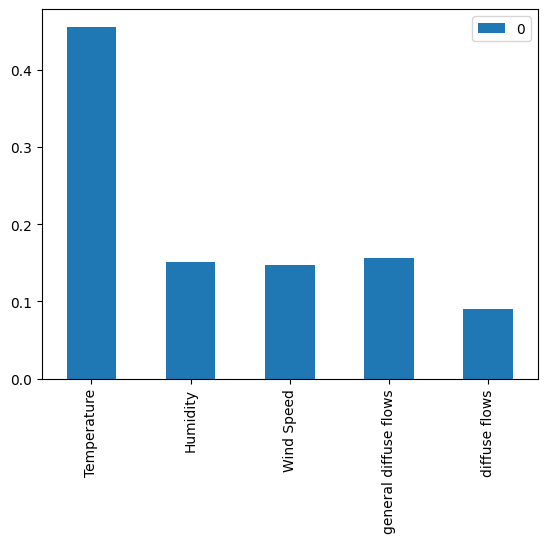

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ORIGINAL_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

[0]	validation_0-rmse:7209.26426	validation_1-rmse:6995.66053
[50]	validation_0-rmse:6901.27804	validation_1-rmse:6713.13202
[100]	validation_0-rmse:6610.15101	validation_1-rmse:6448.16663
[150]	validation_0-rmse:6334.94777	validation_1-rmse:6200.81000
[200]	validation_0-rmse:6074.91041	validation_1-rmse:5970.70250
[250]	validation_0-rmse:5829.31798	validation_1-rmse:5756.24280
[300]	validation_0-rmse:5597.29807	validation_1-rmse:5556.46807
[350]	validation_0-rmse:5378.40825	validation_1-rmse:5370.92827
[400]	validation_0-rmse:5171.75879	validation_1-rmse:5198.23899
[450]	validation_0-rmse:4976.00921	validation_1-rmse:5037.18240
[500]	validation_0-rmse:4791.47911	validation_1-rmse:4888.86187
[550]	validation_0-rmse:4617.54451	validation_1-rmse:4751.63388
[600]	validation_0-rmse:4453.67632	validation_1-rmse:4625.11292
[650]	validation_0-rmse:4299.69307	validation_1-rmse:4508.44441
[700]	validation_0-rmse:4154.83052	validation_1-rmse:4400.55448
[750]	validation_0-rmse:4018.77147	validati

<Axes: >

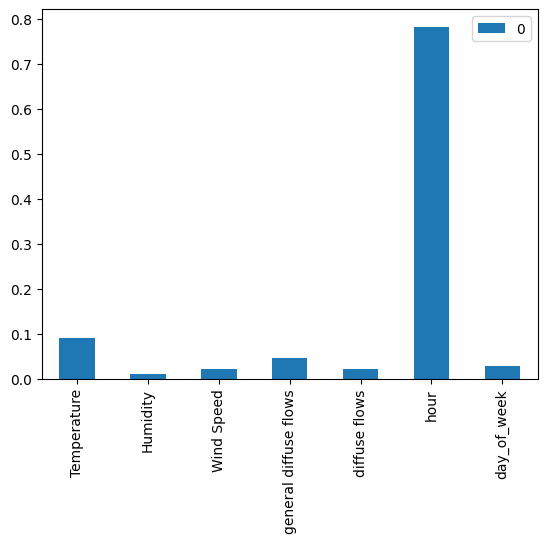

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ORIGINAL_FEATURES + DATETIME_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

[0]	validation_0-rmse:7209.40074	validation_1-rmse:6995.89262
[50]	validation_0-rmse:6908.14508	validation_1-rmse:6726.23576
[100]	validation_0-rmse:6623.69122	validation_1-rmse:6474.57396
[150]	validation_0-rmse:6355.23104	validation_1-rmse:6239.99917
[200]	validation_0-rmse:6102.03838	validation_1-rmse:6022.00607
[250]	validation_0-rmse:5863.29922	validation_1-rmse:5819.52349
[300]	validation_0-rmse:5638.39754	validation_1-rmse:5631.36271
[350]	validation_0-rmse:5426.70759	validation_1-rmse:5456.43412
[400]	validation_0-rmse:5227.46102	validation_1-rmse:5294.26420
[450]	validation_0-rmse:5039.66038	validation_1-rmse:5143.69716
[500]	validation_0-rmse:4863.27238	validation_1-rmse:5004.64966
[550]	validation_0-rmse:4697.72014	validation_1-rmse:4876.33997
[600]	validation_0-rmse:4542.44374	validation_1-rmse:4757.84695
[650]	validation_0-rmse:4397.09508	validation_1-rmse:4649.22795
[700]	validation_0-rmse:4261.14800	validation_1-rmse:4549.89780
[750]	validation_0-rmse:4134.15298	validati

<Axes: >

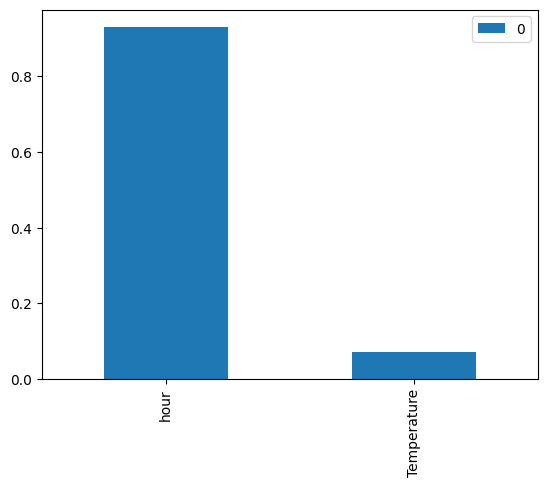

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[['hour', 'Temperature']], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

[0]	validation_0-rmse:7212.77086	validation_1-rmse:6999.26867
[50]	validation_0-rmse:7075.23803	validation_1-rmse:6893.65169
[100]	validation_0-rmse:6946.60666	validation_1-rmse:6793.55615
[150]	validation_0-rmse:6826.41694	validation_1-rmse:6701.11840
[200]	validation_0-rmse:6714.27365	validation_1-rmse:6615.60664
[250]	validation_0-rmse:6610.21437	validation_1-rmse:6538.86466
[300]	validation_0-rmse:6513.37266	validation_1-rmse:6467.97456
[350]	validation_0-rmse:6422.90516	validation_1-rmse:6401.41213
[400]	validation_0-rmse:6337.75432	validation_1-rmse:6337.98577
[450]	validation_0-rmse:6257.44764	validation_1-rmse:6279.78888
[500]	validation_0-rmse:6182.34908	validation_1-rmse:6227.23728
[550]	validation_0-rmse:6112.82240	validation_1-rmse:6180.07151
[600]	validation_0-rmse:6047.21201	validation_1-rmse:6137.70862
[650]	validation_0-rmse:5985.71379	validation_1-rmse:6098.69983
[700]	validation_0-rmse:5926.52558	validation_1-rmse:6059.72460
[750]	validation_0-rmse:5870.85745	validati

<Axes: >

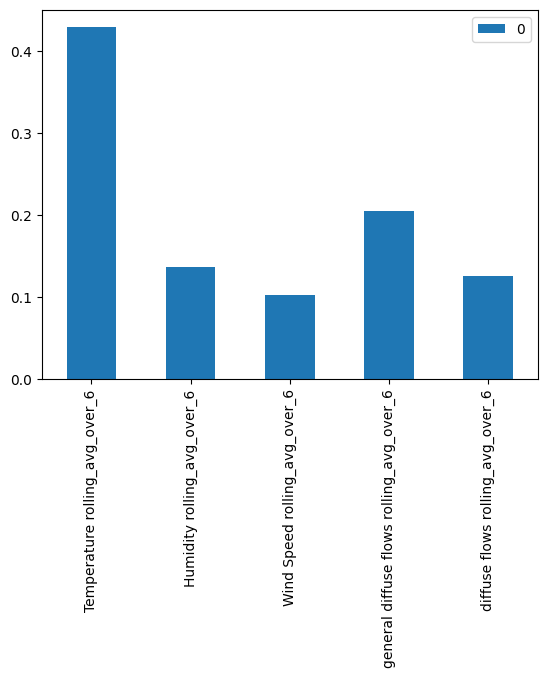

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ROLLING_AVG_OVER_HOUR_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

[0]	validation_0-rmse:7214.54705	validation_1-rmse:7000.80115
[50]	validation_0-rmse:7164.01645	validation_1-rmse:6968.71459
[100]	validation_0-rmse:7117.36141	validation_1-rmse:6940.41192
[150]	validation_0-rmse:7076.13236	validation_1-rmse:6913.56473
[200]	validation_0-rmse:7037.55347	validation_1-rmse:6889.94788
[250]	validation_0-rmse:7001.46621	validation_1-rmse:6868.60765
[300]	validation_0-rmse:6967.60080	validation_1-rmse:6849.61988
[350]	validation_0-rmse:6935.69002	validation_1-rmse:6828.37867
[400]	validation_0-rmse:6904.83139	validation_1-rmse:6805.63838
[450]	validation_0-rmse:6875.38265	validation_1-rmse:6784.92555
[500]	validation_0-rmse:6847.65020	validation_1-rmse:6769.49134
[550]	validation_0-rmse:6821.59091	validation_1-rmse:6756.59826
[600]	validation_0-rmse:6797.01757	validation_1-rmse:6744.74411
[650]	validation_0-rmse:6773.96956	validation_1-rmse:6733.10065
[700]	validation_0-rmse:6751.90552	validation_1-rmse:6724.64667
[750]	validation_0-rmse:6730.69202	validati

<Axes: >

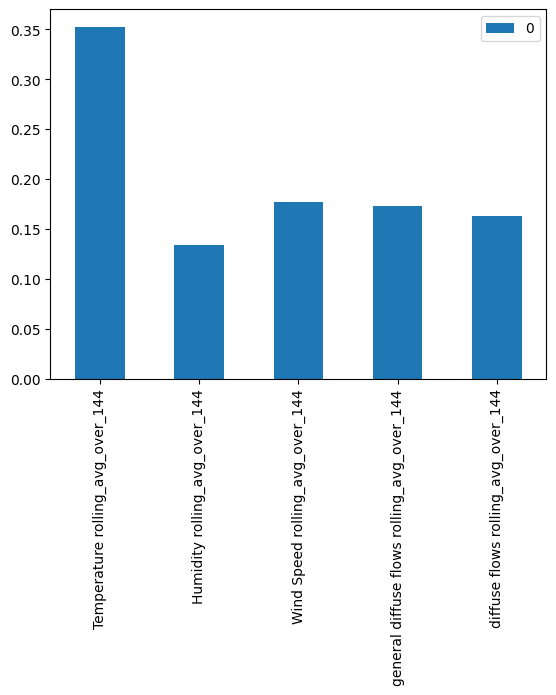

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ROLLING_AVG_OVER_DAY_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

[0]	validation_0-rmse:7209.20049	validation_1-rmse:6995.60023
[50]	validation_0-rmse:6898.05459	validation_1-rmse:6712.02242
[100]	validation_0-rmse:6603.81577	validation_1-rmse:6446.83746
[150]	validation_0-rmse:6325.41630	validation_1-rmse:6197.76359
[200]	validation_0-rmse:6062.20471	validation_1-rmse:5964.30968
[250]	validation_0-rmse:5812.98470	validation_1-rmse:5741.95504
[300]	validation_0-rmse:5577.10084	validation_1-rmse:5531.73696
[350]	validation_0-rmse:5353.79026	validation_1-rmse:5336.66431
[400]	validation_0-rmse:5141.31671	validation_1-rmse:5155.13614
[450]	validation_0-rmse:4939.92463	validation_1-rmse:4983.27955
[500]	validation_0-rmse:4749.70273	validation_1-rmse:4821.86191
[550]	validation_0-rmse:4570.23985	validation_1-rmse:4670.98456
[600]	validation_0-rmse:4400.96989	validation_1-rmse:4531.10854
[650]	validation_0-rmse:4241.04425	validation_1-rmse:4403.64842
[700]	validation_0-rmse:4089.93915	validation_1-rmse:4287.59839
[750]	validation_0-rmse:3947.70428	validati

<Axes: >

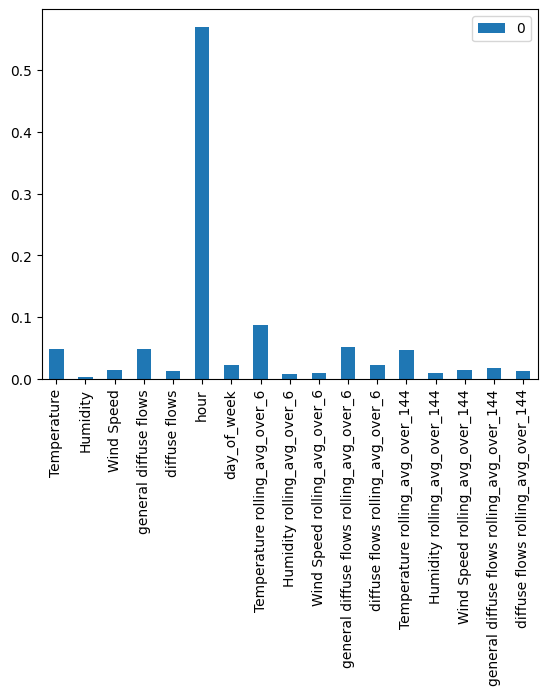

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ORIGINAL_FEATURES + DATETIME_FEATURES + ROLLING_AVG_OVER_HOUR_FEATURES + ROLLING_AVG_OVER_DAY_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

[0]	validation_0-rmse:7209.30025	validation_1-rmse:6995.60827
[50]	validation_0-rmse:6903.07101	validation_1-rmse:6711.45154
[100]	validation_0-rmse:6613.71565	validation_1-rmse:6444.97213
[150]	validation_0-rmse:6340.39875	validation_1-rmse:6195.45751
[200]	validation_0-rmse:6082.26844	validation_1-rmse:5963.37371
[250]	validation_0-rmse:5838.27221	validation_1-rmse:5745.58761
[300]	validation_0-rmse:5607.79950	validation_1-rmse:5541.92417
[350]	validation_0-rmse:5390.01240	validation_1-rmse:5351.88315
[400]	validation_0-rmse:5183.94771	validation_1-rmse:5175.29246
[450]	validation_0-rmse:4989.51134	validation_1-rmse:5009.88377
[500]	validation_0-rmse:4805.45658	validation_1-rmse:4855.25349
[550]	validation_0-rmse:4632.24118	validation_1-rmse:4712.83808
[600]	validation_0-rmse:4469.55899	validation_1-rmse:4582.05998
[650]	validation_0-rmse:4316.76750	validation_1-rmse:4461.15259
[700]	validation_0-rmse:4173.24371	validation_1-rmse:4348.50941
[750]	validation_0-rmse:4038.75368	validati

<Axes: >

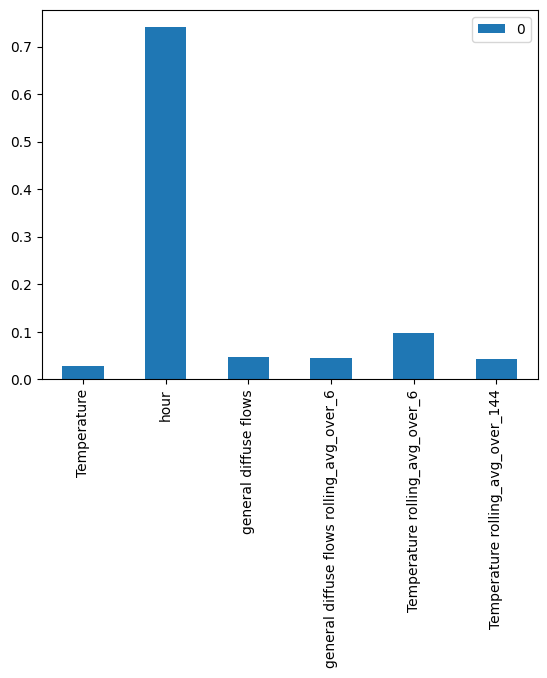

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[['Temperature',
                                                       'hour',
                                                       'general diffuse flows',
                                                       'general diffuse flows rolling_avg_over_6',
                                                       'Temperature rolling_avg_over_6',
                                                       'Temperature rolling_avg_over_144']], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=50)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[['Zone 1 Power Consumption rolling_avg_over_6',
                                                       'Zone 1 Power Consumption rolling_avg_over_144',
                                                       'hour',
                                                       'Temperature']], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train,
          verbose=50)

rolling_window_hour_size = 6
rolling_window_day_size = 144
hour_window = list(y_train[-rolling_window_hour_size:])
day_window = list(y_train[-rolling_window_day_size:])
y_pred = []

for i in range(len(x_test)):
    hour_rolling_avg = np.mean(hour_window)
    day_rolling_avg = np.mean(day_window)
    inp = np.array([[hour_rolling_avg, day_rolling_avg, x_test['hour'].iloc[i], x_test['Temperature'].iloc[i]]])
    prediction = model.predict(inp)[0]
    y_pred.append(prediction)

    hour_window.pop(0)
    hour_window.append(prediction)
    day_window.pop(0)
    day_window.append(prediction)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on Test Data:", rmse)


RMSE on Test Data: 3263.3439609494476


<Axes: >

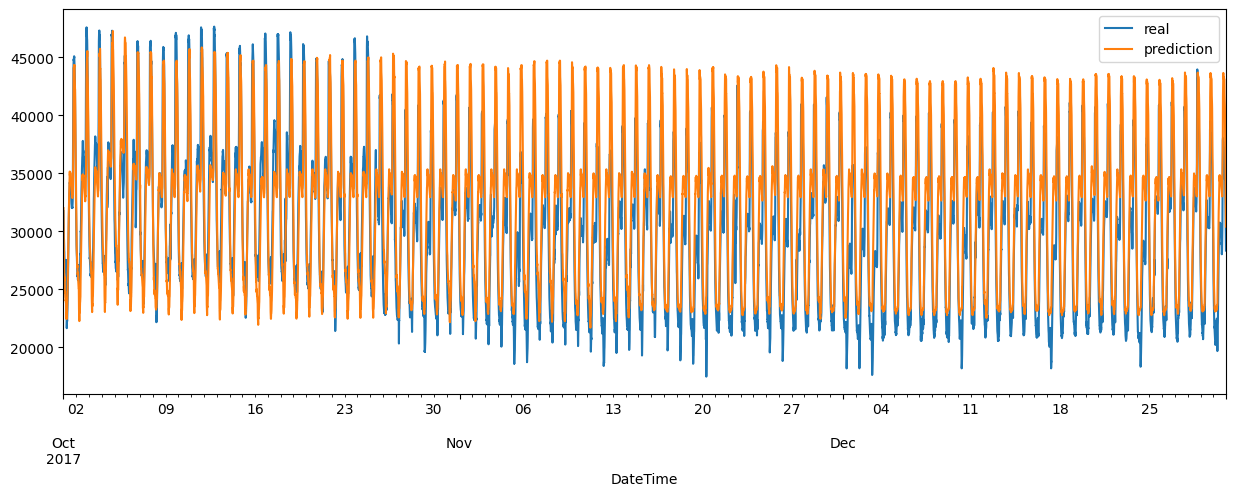

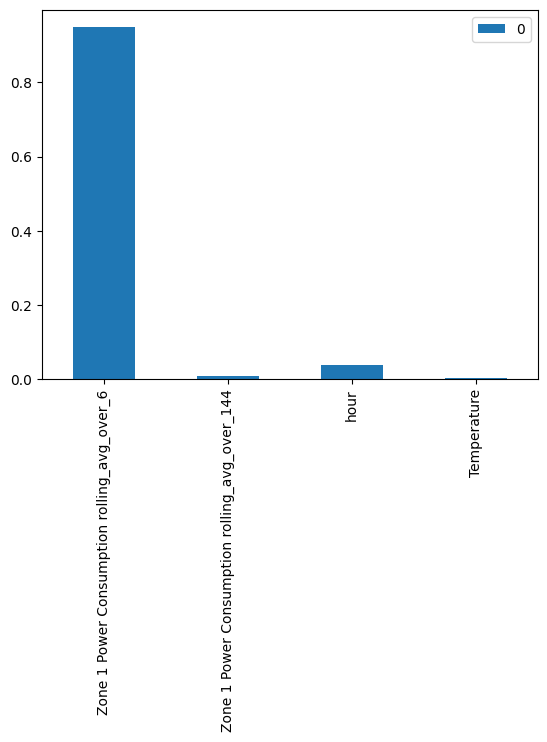

In [ ]:
d = pd.DataFrame()
d['real'] = y_test
d['prediction'] = pd.Series(y_pred, index=y_test.index)
d.plot(figsize=(15,5))

pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

RMSE: 3692.12


<Axes: >

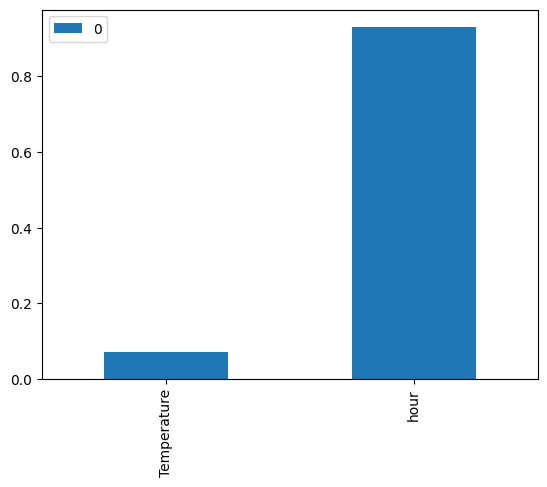

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[['Temperature', 'hour']], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=0)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ORIGINAL_FEATURES + DATETIME_FEATURES + ROLLING_AVG_OVER_HOUR_FEATURES + ROLLING_AVG_OVER_DAY_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)
model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=0)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Withouth RMSE: {rmse:.2f}")

normal_inputs = ORIGINAL_FEATURES + DATETIME_FEATURES + ROLLING_AVG_OVER_HOUR_FEATURES + ROLLING_AVG_OVER_DAY_FEATURES
x_train, x_test, y_train, y_test = train_test_split(X[normal_inputs
                                                      + ['Zone 1 Power Consumption rolling_avg_over_6',
                                                         'Zone 1 Power Consumption rolling_avg_over_144']], Y[TARGETS[0]], test_size=0.25, shuffle=False)
model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train, verbose=0)

rolling_window_hour_size = 6
rolling_window_day_size = 144
hour_window = list(y_train[-rolling_window_hour_size:])
day_window = list(y_train[-rolling_window_day_size:])
y_pred = []

for i in range(len(x_test)):
    hour_rolling_avg = np.mean(hour_window)
    day_rolling_avg = np.mean(day_window)

    input_list = []
    for j in normal_inputs:
        input_list.append(x_test[j].iloc[i])
    input_list.append(hour_rolling_avg)
    input_list.append(day_rolling_avg)

    inp = np.array([input_list])
    prediction = model.predict(inp)[0]
    y_pred.append(prediction)
    hour_window.pop(0)
    hour_window.append(prediction)
    day_window.pop(0)
    day_window.append(prediction)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"With RMSE: {rmse:.2f}")

Withouth RMSE: 2999.94
With RMSE: 2602.18


<Axes: >

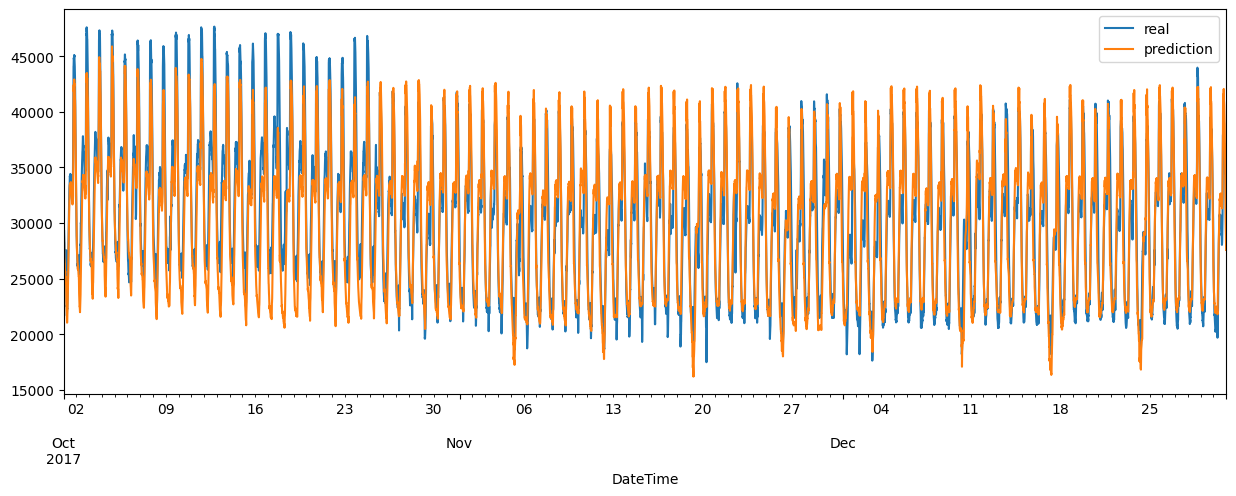

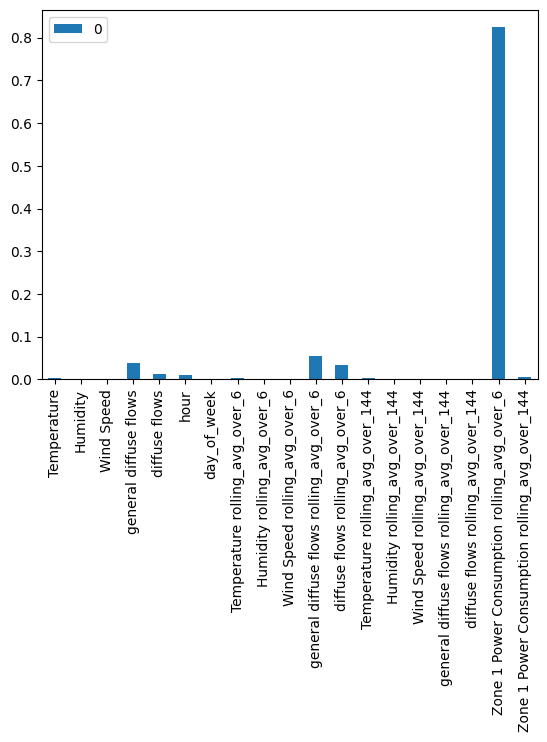

In [ ]:
d = pd.DataFrame()
d['real'] = y_test
d['prediction'] = pd.Series(y_pred, index=y_test.index)
d.plot(figsize=(15,5))

pd.DataFrame(model.feature_importances_, index=model.feature_names_in_).plot(kind='bar')

In [ ]:
# LAG1_FEATURES
# LAG1_FOR_TARGETS_FEATURES

x_train, x_test, y_train, y_test = train_test_split(X[LAG1_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=0)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 5936.41


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ORIGINAL_FEATURES + LAG1_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=0)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 5685.44


In [ ]:
normal_inputs = ORIGINAL_FEATURES + DATETIME_FEATURES + ROLLING_AVG_OVER_HOUR_FEATURES + ROLLING_AVG_OVER_DAY_FEATURES
x_train, x_test, y_train, y_test = train_test_split(X[normal_inputs + LAG1_FEATURES], Y[TARGETS[0]], test_size=0.25, shuffle=False)

model = XGBRegressor(n_estimators=5000, learning_rate=0.001, early_stopping_rounds=50)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=0)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 3001.46


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[ORIGINAL_FEATURES
                                                      + ['Zone 1 Power Consumption lag_1']], Y[TARGETS[0]], test_size=0.25, shuffle=False)
model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train, verbose=0)

last_pred_y = y_train.iloc[-1]
y_pred = []

for i in range(len(x_test)):
    input_list = []
    for j in ORIGINAL_FEATURES:
        input_list.append(x_test[j].iloc[i])
    input_list.append(last_pred_y)
    prediction = model.predict(np.array([input_list]))[0]
    y_pred.append(prediction)
    last_pred_y = prediction

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"With RMSE: {rmse:.2f}")

<ipython-input-62-d077c2770c0e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_pred_y = y_train[-1]


With RMSE: 3801.57


In [ ]:
normal_inputs = (ORIGINAL_FEATURES
                 + DATETIME_FEATURES
                 + ROLLING_AVG_OVER_HOUR_FEATURES
                 + ROLLING_AVG_OVER_DAY_FEATURES
                 + LAG1_FEATURES)
x_train, x_test, y_train, y_test = train_test_split(X[normal_inputs
                                                      + ['Zone 1 Power Consumption rolling_avg_over_6',
                                                         'Zone 1 Power Consumption rolling_avg_over_144',
                                                         'Zone 1 Power Consumption lag_1']], Y[TARGETS[0]], test_size=0.25, shuffle=False)
model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train, verbose=0)

rolling_window_hour_size = 6
rolling_window_day_size = 144
hour_window = list(y_train[-rolling_window_hour_size:])
day_window = list(y_train[-rolling_window_day_size:])
last_pred_y = y_train.iloc[-1]
y_pred = []

for i in range(len(x_test)):
    hour_rolling_avg = np.mean(hour_window)
    day_rolling_avg = np.mean(day_window)

    input_list = []
    for j in normal_inputs:
        input_list.append(x_test[j].iloc[i])
    input_list.append(hour_rolling_avg)
    input_list.append(day_rolling_avg)
    input_list.append(last_pred_y)

    inp = np.array([input_list])
    prediction = model.predict(inp)[0]
    y_pred.append(prediction)
    hour_window.pop(0)
    hour_window.append(prediction)
    day_window.pop(0)
    day_window.append(prediction)
    last_pred_y = prediction

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"FULL RMSE: {rmse:.2f}")

FULL RMSE: 2823.56


In [ ]:
normal_inputs = (ORIGINAL_FEATURES
                 + DATETIME_FEATURES
                 + ROLLING_AVG_OVER_HOUR_FEATURES
                 + ROLLING_AVG_OVER_DAY_FEATURES
                 + LAG1_FEATURES)
x_train, x_test, y_train, y_test = train_test_split(X[normal_inputs
                                                      + ['Zone 1 Power Consumption rolling_avg_over_6',
                                                         'Zone 1 Power Consumption rolling_avg_over_144',
                                                         ]], Y[TARGETS[0]], test_size=0.25, shuffle=False)
model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train, verbose=0)

rolling_window_hour_size = 6
rolling_window_day_size = 144
hour_window = list(y_train[-rolling_window_hour_size:])
day_window = list(y_train[-rolling_window_day_size:])
last_pred_y = y_train.iloc[-1]
y_pred = []

for i in range(len(x_test)):
    hour_rolling_avg = np.mean(hour_window)
    day_rolling_avg = np.mean(day_window)

    input_list = []
    for j in normal_inputs:
        input_list.append(x_test[j].iloc[i])
    input_list.append(hour_rolling_avg)
    input_list.append(day_rolling_avg)

    inp = np.array([input_list])
    prediction = model.predict(inp)[0]
    y_pred.append(prediction)
    hour_window.pop(0)
    hour_window.append(prediction)
    day_window.pop(0)
    day_window.append(prediction)
    last_pred_y = prediction

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"FULL RMSE: {rmse:.2f}")

FULL RMSE: 2603.57


In [ ]:
normal_inputs = (ORIGINAL_FEATURES
                 + DATETIME_FEATURES
                 + ROLLING_AVG_OVER_HOUR_FEATURES
                 + ROLLING_AVG_OVER_DAY_FEATURES)
x_train, x_test, y_train, y_test = train_test_split(X[normal_inputs
                                                      + ['Zone 1 Power Consumption rolling_avg_over_6',
                                                         'Zone 1 Power Consumption rolling_avg_over_144',
                                                         'Zone 1 Power Consumption lag_1']], Y[TARGETS[0]], test_size=0.25, shuffle=False)
model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train, verbose=0)

rolling_window_hour_size = 6
rolling_window_day_size = 144
hour_window = list(y_train[-rolling_window_hour_size:])
day_window = list(y_train[-rolling_window_day_size:])
last_pred_y = y_train.iloc[-1]
y_pred = []

for i in range(len(x_test)):
    hour_rolling_avg = np.mean(hour_window)
    day_rolling_avg = np.mean(day_window)

    input_list = []
    for j in normal_inputs:
        input_list.append(x_test[j].iloc[i])
    input_list.append(hour_rolling_avg)
    input_list.append(day_rolling_avg)
    input_list.append(last_pred_y)

    inp = np.array([input_list])
    prediction = model.predict(inp)[0]
    y_pred.append(prediction)
    hour_window.pop(0)
    hour_window.append(prediction)
    day_window.pop(0)
    day_window.append(prediction)
    last_pred_y = prediction

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"FULL RMSE: {rmse:.2f}")

FULL RMSE: 2780.09


In [ ]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
!pip install optuna catboost

import logging
import warnings
import optuna

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_percentage_error

logging.getLogger("lightgbm").setLevel(logging.ERROR)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore", message="X does not have valid feature names")


In [ ]:
normal_inputs = (ORIGINAL_FEATURES
                 + DATETIME_FEATURES
                 + ROLLING_AVG_OVER_HOUR_FEATURES
                 + ROLLING_AVG_OVER_DAY_FEATURES
                 + LAG1_FEATURES)
x_train, x_test, y_train, y_test = train_test_split(X[normal_inputs
                                                      + ['Zone 1 Power Consumption rolling_avg_over_6',
                                                         'Zone 1 Power Consumption rolling_avg_over_144',
                                                         ]], Y[TARGETS[0]], test_size=0.25, shuffle=False)

In [ ]:
def get_pred(model):
    rolling_window_hour_size = 6
    rolling_window_day_size = 144
    hour_window = list(y_train[-rolling_window_hour_size:])
    day_window = list(y_train[-rolling_window_day_size:])
    y_pred = []

    for i in range(len(x_test)):
        input_list = []
        for j in normal_inputs:
            input_list.append(x_test[j].iloc[i])
        input_list.append(np.mean(hour_window))
        input_list.append(np.mean(day_window))

        inp = np.array([input_list])
        prediction = model.predict(inp)[0]
        y_pred.append(prediction)
        hour_window.pop(0)
        hour_window.append(prediction)
        day_window.pop(0)
        day_window.append(prediction)

    return y_pred

def eval_model(model):
    y_pred = get_pred(model)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return {'RMSE': rmse, 'MAPE': mape}

In [ ]:
# TODO OVERFITTING
model = XGBRegressor(n_estimators=5000, learning_rate=0.001)
model.fit(x_train, y_train, verbose=50)
eval_model(model)

{'RMSE': 2629.866566287084, 'MAPE': 0.06542839549626124}

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
eval_model(model)

{'RMSE': 5097.94581198866, 'MAPE': 0.1510595677335902}

In [ ]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
eval_model(model)

{'RMSE': 5097.943365967201, 'MAPE': 0.15106008679451816}

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
eval_model(model)

{'RMSE': 3563.3963738737425, 'MAPE': 0.08813282068717965}

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
eval_model(model)

{'RMSE': 2675.3453159997484, 'MAPE': 0.06717097971306228}

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100),
    "LightGBM Regression": lgb.LGBMRegressor(n_estimators=100),
    "CatBoost Regression": CatBoostRegressor(verbose=0),
    "AdaBoost Regression": AdaBoostRegressor(n_estimators=100),
    "HistGradient Boosting Regression": HistGradientBoostingRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "SVR": SVR(kernel='rbf')
}

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 41928, number of used features: 5
[LightGBM] [Info] Start training from score 32338.652077


KeyError: 'R2 Score'